In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# MACD Indicator is used to explain Trends. 
# Bullish Momentum: when the signal line crosses above the MACD Line
# Bearish Momentum: when the signal line crosses below the MACD Line

TICKER = "SPY"
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9 # Difference between those two values 
LOOKBACK = 100

def get_data(ticker = TICKER):
    df = yf.download(ticker, start="1993-04-01")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:,:]

def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    # we will be using EMA (Exponential Moving Average from now on, because they are more exact)
    # Step 1: Create Fast and Slow EMA Columns
    df[f"{fast}_ema"] = df["Close"].ewm(span = fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span = slow).mean()

    # Step 2: Create MACD Column (Macd line is the difference between the fast and the slow)
    df[f"MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

    # Step 3: Create MACD Signal Column (Span here = 9-period) == moving average of this line
    df["Signal"] = df[f"MACD"].ewm(span=span).mean()

    # Step 4: MACD Hist is almost always what is used fin TA
    df["MACD_hist"] = 

    # Step 5:

    return df

## Visualizing the Data Set
def main():
    df = get_data()
    df = add_MACD(df)

    return df

main()

/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_2292/3371089868.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal
Date,,,,,,,,,
2025-05-28,584.377441,589.388731,583.641672,588.185611,68445500,584.377441,584.377441,0.000000,0.000000
2025-05-29,586.684265,589.816321,582.726987,589.677105,69973300,585.626971,585.573572,0.053399,0.029666
2025-05-30,586.028015,587.758080,579.913072,585.570617,90601200,585.783499,585.736407,0.047091,0.036807
2025-06-02,589.329102,589.408602,581.722714,584.407325,61630500,586.902707,586.736748,0.165959,0.080558
2025-06-03,592.689819,593.674162,588.473954,588.961210,63606200,588.475045,588.110025,0.365020,0.165179
...,...,...,...,...,...,...,...,...,...
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.929833,660.334662,4.595171,6.107946
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,664.514471,660.470144,4.044327,5.695222
2025-10-15,665.169983,670.229980,658.929993,666.820007,81702600,664.615319,660.806083,3.809236,5.318025


In [57]:
## All the code below was substituted by the in-built functions above 

def main():
    df = get_data()
    df = add_MACD(df)
    print(df.head())

    return df

df = main()

/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_2292/3371089868.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-05-28  584.377441  589.388731  583.641672  588.185611  68445500   
2025-05-29  586.684265  589.816321  582.726987  589.677105  69973300   
2025-05-30  586.028015  587.758080  579.913072  585.570617  90601200   
2025-06-02  589.329102  589.408602  581.722714  584.407325  61630500   
2025-06-03  592.689819  593.674162  588.473954  588.961210  63606200   

Price           12_ema      27_ema      MACD    Signal  
Date                                                    
2025-05-28  584.377441  584.377441  0.000000  0.000000  
2025-05-29  585.626971  585.573572  0.053399  0.029666  
2025-05-30  585.783499  585.736407  0.047091  0.036807  
2025-06-02  586.902707  586.736748  0.165959  0.080558  
2025-06-03  588.475045  588.110025  0.365020  0.165179  


Text(0.5, 1.0, '12 - 27 - 9 MACD Line')

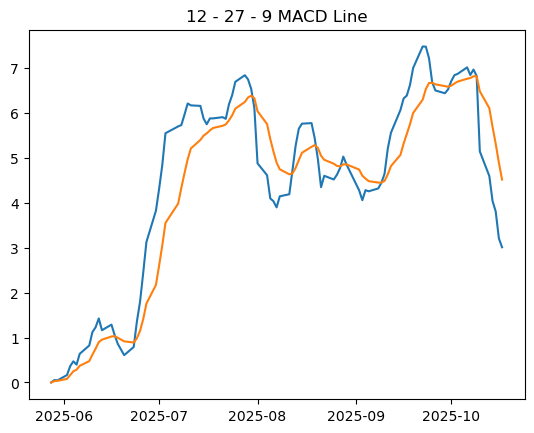

In [58]:
plt.plot(df["MACD"]) # Blue
plt.plot(df["Signal"]) # Orange

# Histogram Strategy:
# When the blue line crosses above the orange line, that signalizes upwards moemntum 
# And when the blue line crosses below the orange line, that is downwards moemntum 
# A Crossover is usually a signal to enter

plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")

Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal
Date,,,,,,,,,
2025-05-28,584.377441,589.388731,583.641672,588.185611,68445500,584.377441,584.377441,0.000000,0.000000
2025-05-29,586.684265,589.816321,582.726987,589.677105,69973300,585.626971,585.573572,0.053399,0.029666
2025-05-30,586.028015,587.758080,579.913072,585.570617,90601200,585.783499,585.736407,0.047091,0.036807
2025-06-02,589.329102,589.408602,581.722714,584.407325,61630500,586.902707,586.736748,0.165959,0.080558
2025-06-03,592.689819,593.674162,588.473954,588.961210,63606200,588.475045,588.110025,0.365020,0.165179
...,...,...,...,...,...,...,...,...,...
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.929833,660.334662,4.595171,6.107946
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,664.514471,660.470144,4.044327,5.695222
2025-10-15,665.169983,670.229980,658.929993,666.820007,81702600,664.615319,660.806083,3.809236,5.318025
